# Data Preprocessing module
Перед нами стоит задача построить модель машинного обучения, которая бы на основе каких то данных определяла ядовитость гриба, т.е ядовит он или нет, в этой работе мы построим несколько моделей машинного обучения и посмотрим как разные модели справляются с задачей

В этой части мы проведем препроцессинг данных, изучим датасет на количество переменных, количество признаков, отсутсвующие значения и сбалансированность данных 

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [4]:
df_train = pd.read_csv('./mushrooms/train.csv', nrows=50000)
df_test = pd.read_csv('./mushrooms/test.csv', nrows=10000)

In [5]:
df_train

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,p,1.62,b,NaN,n,f,a,NaN,g,...,NaN,s,n,NaN,NaN,f,f,NaN,d,a
49996,49996,e,5.58,f,y,w,f,e,c,n,...,NaN,NaN,w,NaN,w,t,e,NaN,m,a
49997,49997,e,8.90,s,NaN,n,f,NaN,NaN,w,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
49998,49998,p,3.83,b,h,k,f,a,NaN,k,...,NaN,NaN,g,NaN,w,f,f,k,g,a


In [6]:
df_test

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3126940,3.66,x,h,n,f,NaN,c,n,5.85,...,NaN,s,w,NaN,w,f,f,k,d,u
9996,3126941,3.87,x,s,e,f,a,c,o,5.61,...,NaN,NaN,e,NaN,NaN,f,f,NaN,m,u
9997,3126942,6.95,x,y,n,f,e,c,p,4.41,...,NaN,y,n,NaN,NaN,f,f,NaN,d,a
9998,3126943,5.21,x,t,o,f,a,c,n,5.54,...,NaN,y,n,NaN,NaN,t,z,NaN,d,u


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    50000 non-null  int64  
 1   class                 50000 non-null  object 
 2   cap-diameter          50000 non-null  float64
 3   cap-shape             49999 non-null  object 
 4   cap-surface           39270 non-null  object 
 5   cap-color             50000 non-null  object 
 6   does-bruise-or-bleed  50000 non-null  object 
 7   gill-attachment       41584 non-null  object 
 8   gill-spacing          29974 non-null  object 
 9   gill-color            50000 non-null  object 
 10  stem-height           50000 non-null  float64
 11  stem-width            50000 non-null  float64
 12  stem-root             5755 non-null   object 
 13  stem-surface          18330 non-null  object 
 14  stem-color            50000 non-null  object 
 15  veil-type          

In [8]:
df_train.describe()

,id,cap-diameter,stem-height,stem-width
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,6.317357,6.345901,11.172813
std,14433.901067,4.733294,2.708451,8.132838
min,0.000000,0.470000,0.000000,0.000000
25%,12499.750000,3.310000,4.660000,4.970000
50%,24999.500000,5.740000,5.870000,9.650000
75%,37499.250000,8.240000,7.410000,15.670000
max,49999.000000,59.510000,35.640000,86.520000


In [9]:
for col in df_train.columns:
    unique_count = df_train[col].nunique()
    print(f'{col}: {unique_count}')

id: 50000
class: 2
cap-diameter: 2103
cap-shape: 10
cap-surface: 19
cap-color: 16
does-bruise-or-bleed: 3
gill-attachment: 14
gill-spacing: 8
gill-color: 17
stem-height: 1731
stem-width: 3551
stem-root: 8
stem-surface: 15
stem-color: 17
veil-type: 3
veil-color: 8
has-ring: 5
ring-type: 12
spore-print-color: 8
habitat: 18
season: 4


In [10]:
missing_counts = df_train.isnull().sum().sort_values(ascending=True)
print(missing_counts) 

id                          0
has-ring                    0
stem-color                  0
stem-width                  0
gill-color                  0
does-bruise-or-bleed        0
stem-height                 0
cap-diameter                0
class                       0
cap-color                   0
season                      0
habitat                     1
cap-shape                   1
ring-type                2033
gill-attachment          8416
cap-surface             10730
gill-spacing            20026
stem-surface            31670
veil-color              44071
stem-root               44245
spore-print-color       45743
veil-type               47499
dtype: int64


In [11]:
missing_counts = df_test.isnull().sum().sort_values(ascending=True)
print(missing_counts) 

id                         0
has-ring                   0
stem-color                 0
habitat                    0
stem-height                0
stem-width                 0
cap-shape                  0
cap-diameter               0
does-bruise-or-bleed       0
season                     0
gill-color                 1
cap-color                  1
ring-type                360
gill-attachment         1702
cap-surface             2131
gill-spacing            4059
stem-surface            6475
veil-color              8817
stem-root               8853
spore-print-color       9116
veil-type               9527
dtype: int64


In [12]:
imputer = SimpleImputer(strategy='median') 
df_train[['cap-diameter']] = imputer.fit_transform(df_train[['cap-diameter']])  
df_test[['cap-diameter']] = imputer.fit_transform(df_test[['cap-diameter']])    

In [13]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
categorical_cols = df_test.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_imputer = SimpleImputer(strategy='most_frequent')
    df_train[col] = mode_imputer.fit_transform(df_train[[col]]).ravel()
    if col in df_test.columns:
        df_test[col] = mode_imputer.transform(df_test[[col]]).ravel()

In [14]:
missing_counts = df_train.isnull().sum().sort_values(ascending=True)
print(missing_counts) 

id                      0
spore-print-color       0
ring-type               0
has-ring                0
veil-color              0
veil-type               0
stem-color              0
stem-surface            0
stem-root               0
stem-width              0
stem-height             0
gill-color              0
gill-spacing            0
gill-attachment         0
does-bruise-or-bleed    0
cap-color               0
cap-surface             0
cap-shape               0
cap-diameter            0
class                   0
habitat                 0
season                  0
dtype: int64


In [15]:
missing_counts = df_test.isnull().sum().sort_values(ascending=True)
print(missing_counts) 

id                      0
spore-print-color       0
ring-type               0
has-ring                0
veil-color              0
veil-type               0
stem-color              0
stem-surface            0
stem-root               0
habitat                 0
stem-width              0
gill-color              0
gill-spacing            0
gill-attachment         0
does-bruise-or-bleed    0
cap-color               0
cap-surface             0
cap-shape               0
cap-diameter            0
stem-height             0
season                  0
dtype: int64


In [16]:
numerical= ['cap-diameter', 'stem-height', 'stem-width']
scaler = StandardScaler()
df_train[numerical] = scaler.fit_transform(df_train[numerical])
df_test[numerical] = scaler.fit_transform(df_test[numerical]) 

In [33]:
label_encoder = LabelEncoder()
categorical_cols = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 
                     'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
                     'stem-surface', 'stem-color', 'veil-type', 'veil-color', 
                     'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

df_train = label_encoder.fit_transform(df_train['class'].astype(float))
for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col].astype(str))
    df_test[col] = label_encoder.fit_transform(df_test[col].astype(str))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    50000 non-null  int64  
 1   class                 50000 non-null  object 
 2   cap-diameter          50000 non-null  float64
 3   cap-shape             50000 non-null  int32  
 4   cap-surface           50000 non-null  int32  
 5   cap-color             50000 non-null  int32  
 6   does-bruise-or-bleed  50000 non-null  int32  
 7   gill-attachment       50000 non-null  int32  
 8   gill-spacing          50000 non-null  int32  
 9   gill-color            50000 non-null  int32  
 10  stem-height           50000 non-null  float64
 11  stem-width            50000 non-null  float64
 12  stem-root             50000 non-null  int32  
 13  stem-surface          50000 non-null  int32  
 14  stem-color            50000 non-null  int32  
 15  veil-type          

In [19]:
df_train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,0.524512,4,13,13,1,1,4,14,...,3,10,14,2,6,0,1,1,4,0
1,1,p,-0.381843,9,6,9,1,1,4,8,...,3,14,9,2,6,3,11,1,4,3
2,2,e,0.131547,4,13,0,1,13,4,14,...,3,10,8,2,6,0,1,1,9,3
3,3,e,-0.514944,4,17,3,1,12,4,6,...,3,10,14,2,6,0,1,1,4,2
4,4,e,-0.098739,9,9,14,1,3,4,14,...,3,10,14,2,6,0,1,1,5,0


In [29]:
df_test.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,0.492972,8,11,6,1,0,0,12,1.772391,...,0,5,12,0,5,1,3,1,0,0
1,3116946,0.121722,4,11,7,0,0,0,13,-1.892559,...,0,5,6,0,5,0,2,1,0,0
2,3116947,-0.923751,0,3,6,0,0,0,7,-0.067518,...,0,5,6,0,5,0,2,1,0,1
3,3116948,-0.610109,8,11,6,0,6,0,7,-0.513557,...,0,5,12,0,3,1,9,1,0,2
4,3116949,-0.034032,8,4,12,0,5,0,13,0.136916,...,0,5,13,0,6,1,2,1,0,2


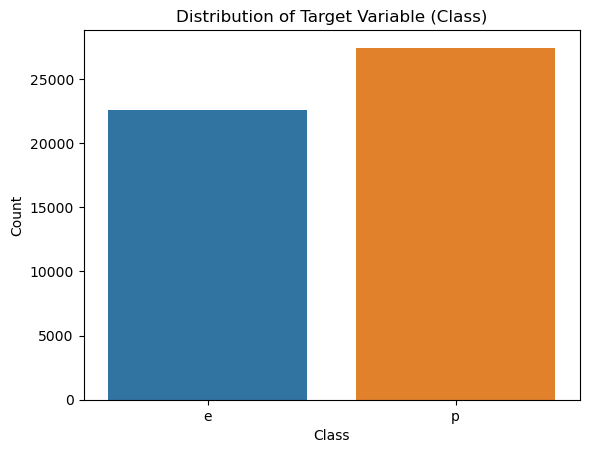

In [20]:
sns.countplot(x='class', data=df_train)
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

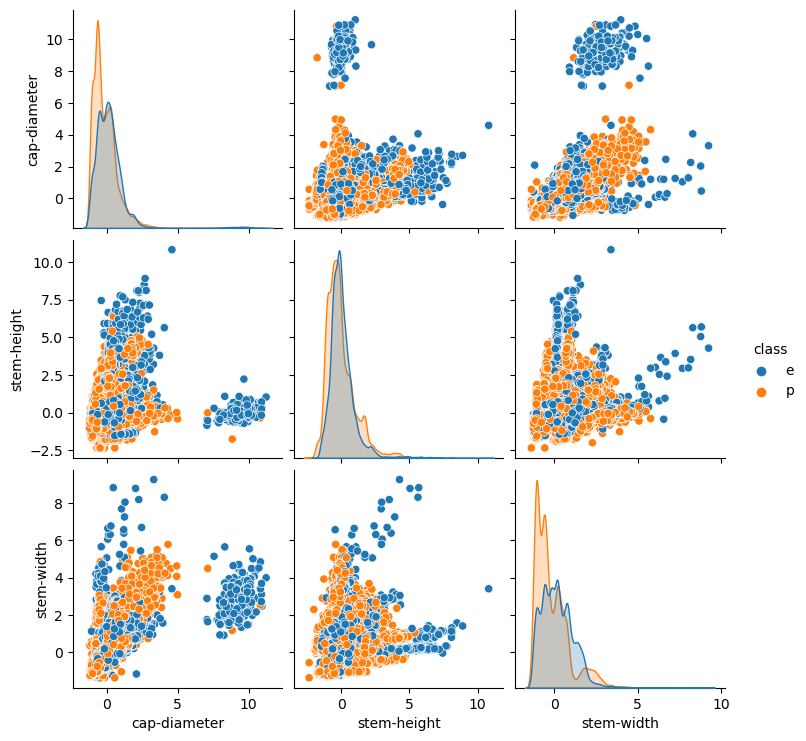

In [21]:
sns.pairplot(df_train[numerical + ['class']], hue='class')

# Machine Learning module
Мы провели исследование датасета на поставленные нами задачи, теперь построим модели машииного обучения, в этом разделе мы построим случайный лес, логистическую регрессию и градиентный бустинг, также соберем метрики 

In [22]:
X = df_train.drop(columns=['id', 'class'])
y = df_train['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [23]:
X_train.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
13496,-0.954389,0,14,8,1,1,4,6,-0.519084,-1.142640,3,10,8,2,6,0,1,1,4,0
36860,-0.147332,8,14,8,2,3,4,2,-0.212633,-0.531531,3,10,8,2,6,0,1,1,4,0
36448,-1.043123,0,6,8,1,1,4,8,-0.899379,-1.217645,3,11,8,2,6,0,1,1,6,1
14452,-0.675510,4,13,3,1,3,4,14,-1.250137,-0.391357,3,10,14,2,6,0,1,1,5,0
22927,-0.981854,9,5,15,1,3,4,14,-0.028024,-1.108211,3,11,15,2,6,0,1,1,6,2


In [24]:
rfc = RandomForestClassifier()

In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = rfc.predict(X_test)
y_train

13496    p
36860    p
36448    p
14452    p
22927    e
        ..
47730    p
2290     p
31310    p
21235    p
43264    e
Name: class, Length: 40000, dtype: object

In [36]:
y_pred

array(['p', 'p', 'e', ..., 'e', 'e', 'e'], dtype=object)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
classification_report=classification_report(y_test, y_pred)
print(accuracy)
print(classification_report)

0.9901
              precision    recall  f1-score   support

           e       0.99      0.99      0.99      4487
           p       0.99      0.99      0.99      5513

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 3600x2100 with 0 Axes>

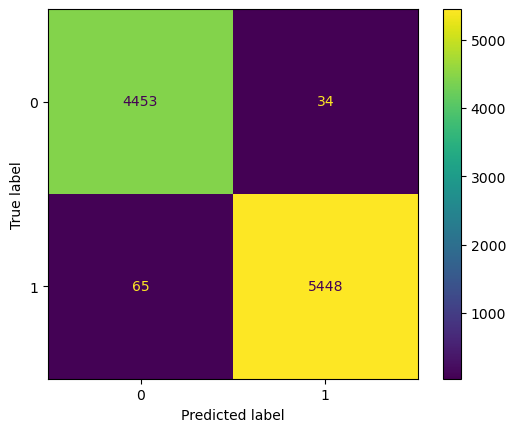

In [47]:
plt.figure(figsize = (12,7), dpi=300)
display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
display.plot()
plt.show()

In [49]:
grb = GradientBoostingClassifier()
grb.fit(X_train, y_train)
y_pred_grb = grb.predict(X_test)
y_pred_grb

array(['p', 'p', 'e', ..., 'e', 'p', 'e'], dtype=object)

Accuracy: 0.916


<Figure size 3600x2100 with 0 Axes>

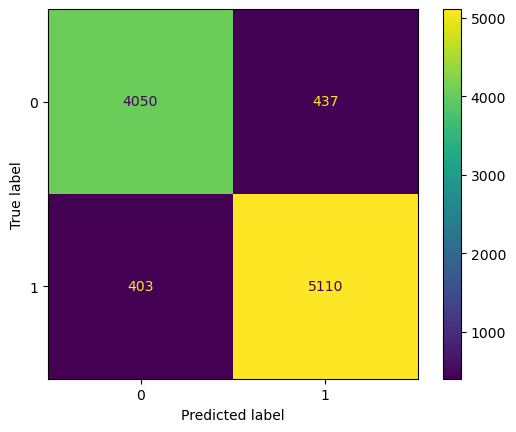

In [52]:
accuracy = accuracy_score(y_test, y_pred_grb)
print(f'Accuracy: {accuracy}')
plt.figure(figsize = (12,7), dpi=300)
display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_grb))
display.plot()
plt.show()

Accuracy: 0.6588


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 3600x2100 with 0 Axes>

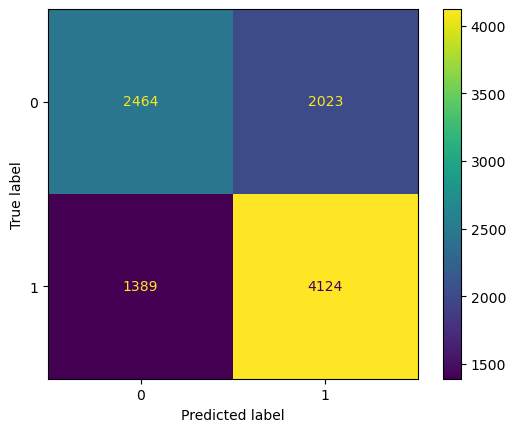

In [54]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
print(f'Accuracy: {accuracy}')
plt.figure(figsize = (12,7), dpi=300)
display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log))
display.plot()
plt.show()

# Pytorch module
Мы создали три модели машииного обучения при помощи Sklearn, в этом модули мы рассмотрим решение задачи при помощи более глубокого обучения моделей